<a href="https://colab.research.google.com/github/CLinnSheng/SC3000/blob/main/SCSY_Linn_Sheng_and_Rui_Xian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC3000 LAB ASSIGNMENT 1

## Tutorial Group SCSY
- CHIN LINN SHENG (U2320052G)
- LIAW RUI XIAN (U2320440D)

Contributions:
1. Chin Linn Sheng
>- Researched PPO reinforcement learning algorithm
>- Translate the research indo code

2. Liaw Rui Xian
>- Researched PPO reinforcement learning algorithm
>- Translate the research indo code

## Problem Description
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. In this project, you will need to develop a Reinforcement Learning (RL) agent. The trained agent makes the decision to push the cart to the left or right based on the cart position, velocity, and the pole angle, angular velocity.

## Action Space
The action is an ndarray with shape (1,) which can take values {0, 1} indicating pushing the cart to the left or right, respectively. Note that the velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.

## Observation Space
The observation is an ndarray with shape (4,) with the values corresponding to the following positions and velocities:

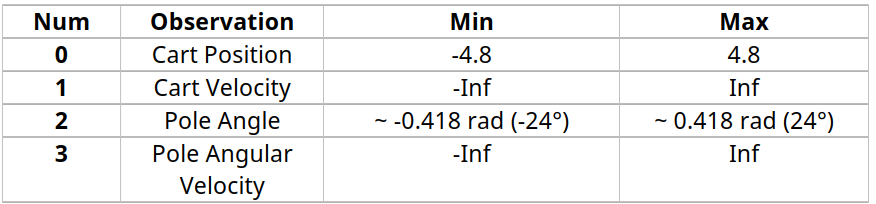

## Conditions
Poles is said to balanced if:
- Pole Angle is at most ±12°
- Cart Position is at most ±2.4 (center of the cart reaches the edge of the display)

## Goal
Balance the pole for 500 states per episode

## Solution
The reinforcement learning algorithm that we picked is **Proximal Policy Optimization (PPO)**

### Proximal Policy Optimization (PPO)

---
The intuition behind this reinforcement learning algorthm is that we want to improve the training stability of the policiy by limiting the changes we make to the policy at each traning.





$\displaystyle L(\theta) = {{E}}_t \left[ \min \left( r_t(\theta) \hat{A}_t, \text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon) \hat{A}_t \right) \right]$

Where:
- θ represents the policiy parameters
- $r_t(θ)$ is the probability ratio between the new and old policies.
- $\hat{A}_t$ is the estimated advantage at time step t, indicating how much better an action performed compared to the expected performance.
- ϵ is a constant that defines the clipping range.

The function consists of two main terms:


1.   Unclipped Objective:
> * Unclipped Objective:
>> $r_t(θ)\hat{A}_t$ represents the standard policy gradient objective  which encourage increasing the porbability of advantageous actions and decreasing it for disadvantageous ones.
2.   Clipped Objective:
> * $\text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon) \hat{A}_t$ restricts $r_t(θ)$ to the interval $[1 - ϵ, 1 + ϵ]$ preventing significant deviatoins from the old policy.

By taking the minimum of these two terms, PPO ensures that does not increase when the policy update would cause $r_t(θ)$ to move outside of the specified range. This clipping mechanicism acts as a regularizer, prevent large policy updates that could destabilize training.




## Rationale of Choosing PPO Instead of Other RL Algo
- PPO is designed to be sample-efficient. It means that it can learn the optimal policy with fewer samples from the environment. This effciency is beneficial in cartpole balancing problem, where each episiode is relatively short and time consuming, so rapid learning is desireable.
- PPO can handle both discrete and continuous action spaces, making it versatiles for various RL problem unlike Q-learning RL algorithm requires discretization of the state space. Since cartpole balancing problem has a continuous state space, this becomes an advantage for PPO.
-  PPO is robust to envrionmental pertubations. Consistent performance even under unpredictable conditions.

## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install stable_baselines3
!pip install 'shimmy>=2.0'


  Using cached pygame-2.1.0.tar.gz (5.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Us

## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

## Helper Function For Rendering Video

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

<!-- Action Space <br> Output: Discrete(2) means there are 2 valid discrete actions which are 0 and 1.**bold text** -->

<!-- Observation Space <br> The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity. -->

<!-- We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state. -->

<!-- For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500). -->

### Setting Up the Environment

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym

In [ ]:
env = gym.make("CartPole-v1")
env = DummyVecEnv([lambda: env])
eval_env = DummyVecEnv([lambda: gym.make('CartPole-v1')])


In [ ]:
# Set up the evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./',  # Save the best model
    log_path='./logs/',         # Log directory
    eval_freq=5000,             # Frequency of evaluation (every 5000 timesteps)
    deterministic=True,         # Use deterministic policy for evaluation
    render=False                # Don't render during evaluation
)

In [ ]:
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=2.5e-4,
    n_steps=4096,
    batch_size=256,
    n_epochs=30,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    device="cpu"
)

Using cpu device


## Task 1: Development of RL Agent & Demonstrate its Correctness

### Training the model
- Train the model for a total timestep of 100000 where timestep is the number of samples to train on

In [ ]:
model.learn(total_timesteps=100000, callback=eval_callback)

-----------------------------
| time/              |      |
|    fps             | 1154 |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 4096 |
-----------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=102.40 +/- 26.20
Episode length: 102.40 +/- 26.20
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 102         |
|    mean_reward          | 102         |
| time/                   |             |
|    total_timesteps      | 5000        |
| train/                  |             |
|    approx_kl            | 0.011807781 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.0105     |
|    learning_rate        | 0.00025     |
|    loss                 | 5.57        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 43.7        |
-----------------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 765  |
|    iterations      | 2    |
|    time_el

In [ ]:
# Saving the final model
model.save("ppo_cartpole_model")

Testing the Model

In [ ]:
observation = env.reset()
action, _ = model.predict(observation[0])
print("Observation:", observation[0])
print("Chosen action:", action)

Observation: [ 0.00193139 -0.01458948 -0.00079854 -0.01652322]
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

- Ran the trained agent for 100 episodes and displayed the score for each episode.
- Calculate the average score the agent received

Print the average reward over the 100 episodes.

In [ ]:
sum_episode_scores = []

for episode in range(1, 101):    ## 100 episodes
    score = 0
    obs = env.reset()
    done = False
    state = 0

    while True:
        action = model.predict(obs)[0]
        observation, reward, done, info = env.step(action)      ## apply action
        pos = observation[0][0]
        angle = observation[0][2]
        if abs(pos) > 2.4 or abs(angle) > 0.209:
            break
        if state == 500:
            break
        obs = observation
        score += reward
        state += 1

    print('Episode:', episode, ';   Score:', score)
    sum_episode_scores.append(score)


print("Average score is ", sum(sum_episode_scores) / len(sum_episode_scores))

env.close()

Episode: 1 ;   Score: [500.]
Episode: 2 ;   Score: [500.]
Episode: 3 ;   Score: [500.]
Episode: 4 ;   Score: [500.]
Episode: 5 ;   Score: [500.]
Episode: 6 ;   Score: [500.]
Episode: 7 ;   Score: [500.]
Episode: 8 ;   Score: [500.]
Episode: 9 ;   Score: [500.]
Episode: 10 ;   Score: [500.]
Episode: 11 ;   Score: [500.]
Episode: 12 ;   Score: [500.]
Episode: 13 ;   Score: [500.]
Episode: 14 ;   Score: [500.]
Episode: 15 ;   Score: [500.]
Episode: 16 ;   Score: [500.]
Episode: 17 ;   Score: [500.]
Episode: 18 ;   Score: [500.]
Episode: 19 ;   Score: [500.]
Episode: 20 ;   Score: [500.]
Episode: 21 ;   Score: [500.]
Episode: 22 ;   Score: [500.]
Episode: 23 ;   Score: [500.]
Episode: 24 ;   Score: [500.]
Episode: 25 ;   Score: [500.]
Episode: 26 ;   Score: [500.]
Episode: 27 ;   Score: [500.]
Episode: 28 ;   Score: [500.]
Episode: 29 ;   Score: [500.]
Episode: 30 ;   Score: [500.]
Episode: 31 ;   Score: [500.]
Episode: 32 ;   Score: [500.]
Episode: 33 ;   Score: [500.]
Episode: 34 ;   Sco

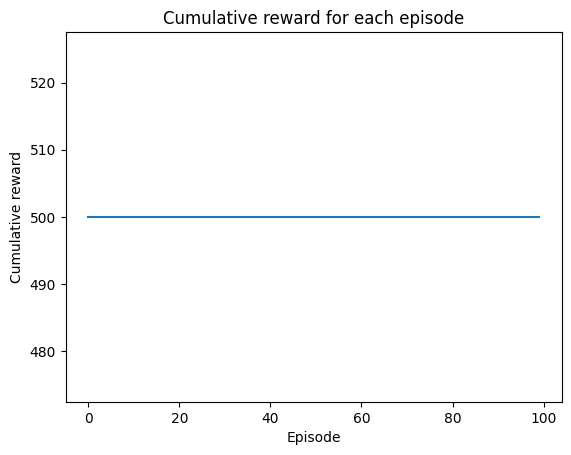

In [ ]:
plt.plot(sum_episode_scores)
plt.title("Cumulative reward for each episode")
plt.ylabel("Cumulative reward")
plt.xlabel("Episode")
plt.show()

The agent has successfully mastered the CartPole environment, achieving the maximum score of 500 in all episodes.
This indicates that the policy is optimal, balancing the pole until the environment's time limit.
Since there is no variance in scores, the model has likely fully converged.


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [ ]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = RecordVideo(env, "./video")
obs, info = env.reset()
total = 0
state = 0

while True:
    env.render()
    action = model.predict(obs)[0]
    observation, reward, done, info = env.step(action)

    if (abs(observation[0]) > 2.4 or abs(observation[2]) > 0.209):
        break
    if state == 500:
        break
    obs = observation
    total += reward
    state += 1

env.close()
show_video()

### References


*   https://roboticslaburjc.github.io/2020-phd-ruben-lucas/projects/2022-11-07-Added_PPO_To_RLStudio_cartpole_algorithms_comparison/
*   https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
* https://huggingface.co/blog/deep-rl-ppo#the-intuition-behind-ppo

